In [1]:
import random
import json
import requests
from config import api_key_alpha
from pprint import pprint
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

In [2]:
#Creat Data Fram of trades since 1/1/2021
query_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=60min&outputsize=full&apikey={api_key_alpha}"

In [3]:
gme_get = requests.get(query_url).json()

pprint(gme_get)

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close '
                                 'prices and volume',
               '2. Symbol': 'GME',
               '3. Last Refreshed': '2021-03-19 20:00:00',
               '4. Interval': '60min',
               '5. Output Size': 'Full size',
               '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2021-01-25 05:00:00': {'1. open': '72.5000',
                                                 '2. high': '136.6300',
                                                 '3. low': '72.2000',
                                                 '4. close': '105.3900',
                                                 '5. volume': '1194735'},
                         '2021-01-25 06:00:00': {'1. open': '106.7700',
                                                 '2. high': '109.0000',
                                                 '3. low': '86.2500',
                                                 '4. close': '96.7700',

                                                 '5. volume': '3877387'},
                         '2021-02-03 16:00:00': {'1. open': '98.0100',
                                                 '2. high': '100.3745',
                                                 '3. low': '90.5900',
                                                 '4. close': '92.0431',
                                                 '5. volume': '3790591'},
                         '2021-02-03 17:00:00': {'1. open': '92.2700',
                                                 '2. high': '93.3600',
                                                 '3. low': '88.1000',
                                                 '4. close': '90.6000',
                                                 '5. volume': '415551'},
                         '2021-02-03 18:00:00': {'1. open': '91.4700',
                                                 '2. high': '92.0300',
                                                 '3. low': '88.9500'

                                                 '3. low': '52.0000',
                                                 '4. close': '52.4000',
                                                 '5. volume': '94780'},
                         '2021-02-16 10:00:00': {'1. open': '52.2500',
                                                 '2. high': '53.5000',
                                                 '3. low': '51.0500',
                                                 '4. close': '51.3900',
                                                 '5. volume': '1285171'},
                         '2021-02-16 11:00:00': {'1. open': '51.3700',
                                                 '2. high': '52.8700',
                                                 '3. low': '49.8100',
                                                 '4. close': '50.5000',
                                                 '5. volume': '1879712'},
                         '2021-02-16 12:00:00': {'1. open': '50.5400',

                                                 '2. high': '180.0000',
                                                 '3. low': '140.7200',
                                                 '4. close': '154.6150',
                                                 '5. volume': '20861660'},
                         '2021-02-25 15:00:00': {'1. open': '155.3694',
                                                 '2. high': '156.0000',
                                                 '3. low': '126.3000',
                                                 '4. close': '147.3601',
                                                 '5. volume': '16530715'},
                         '2021-02-25 16:00:00': {'1. open': '147.3400',
                                                 '2. high': '149.6700',
                                                 '3. low': '101.0000',
                                                 '4. close': '109.1599',
                                                 '5. volum

                                                 '4. close': '193.2000',
                                                 '5. volume': '85593'},
                         '2021-03-09 05:00:00': {'1. open': '208.0000',
                                                 '2. high': '238.0000',
                                                 '3. low': '199.4000',
                                                 '4. close': '232.0000',
                                                 '5. volume': '465876'},
                         '2021-03-09 06:00:00': {'1. open': '231.2100',
                                                 '2. high': '233.9300',
                                                 '3. low': '219.2500',
                                                 '4. close': '224.5000',
                                                 '5. volume': '222532'},
                         '2021-03-09 07:00:00': {'1. open': '224.4200',
                                                 '2. high': '

                                                 '2. high': '206.0500',
                                                 '3. low': '203.0000',
                                                 '4. close': '203.9900',
                                                 '5. volume': '15772'},
                         '2021-03-19 09:00:00': {'1. open': '203.9495',
                                                 '2. high': '206.0000',
                                                 '3. low': '199.2100',
                                                 '4. close': '201.0000',
                                                 '5. volume': '66036'},
                         '2021-03-19 10:00:00': {'1. open': '201.0000',
                                                 '2. high': '203.0300',
                                                 '3. low': '182.6600',
                                                 '4. close': '191.1100',
                                                 '5. volume': '3

In [4]:
GME_df_hourly = pd.DataFrame(gme_get['Time Series (60min)']).T
GME_df_hourly = GME_df_hourly.rename(columns={'1. open': 'Opening Price',
                                '2. high': 'Highest Price',
                                '3. low': 'Lowest Price',
                                '4. close': 'Closing Price',
                                '5. volume': 'Trade Volume'})
GME_df_hourly



,Opening Price,Highest Price,Lowest Price,Closing Price,Trade Volume
2021-03-19 20:00:00,199.9800,199.9900,198.5601,199.0000,20719
2021-03-19 19:00:00,200.2400,200.2900,199.0000,200.0000,35919
2021-03-19 18:00:00,200.0000,200.4000,199.5500,200.2400,46334
2021-03-19 17:00:00,200.2700,201.0000,198.2500,200.4000,333311
2021-03-19 16:00:00,212.2300,212.2300,199.4600,199.4600,2566184
...,...,...,...,...,...
2021-01-25 09:00:00,91.7100,104.5300,86.9999,98.0500,4674120
2021-01-25 08:00:00,94.4800,97.0000,86.7200,91.6500,2187519
2021-01-25 07:00:00,96.9300,101.7000,90.3500,94.4300,784325
2021-01-25 06:00:00,106.7700,109.0000,86.2500,96.7700,885972


In [5]:
#Create Lists:
opening = GME_df_hourly['Opening Price'].astype(float)
closing = GME_df_hourly['Closing Price'].astype(float)
low = GME_df_hourly['Lowest Price'].astype(float)
high = GME_df_hourly['Highest Price'].astype(float)
volume = GME_df_hourly['Trade Volume'].astype(float)

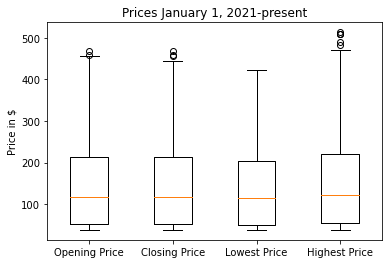

In [6]:
#Make boxplot of prices since 1/1/2021
fig1, ax1 = plt.subplots()
plot_GME = [opening,closing,low,high]
price_labels = ["Opening Price", "Closing Price","Lowest Price","Highest Price"]
ax1.set_title('Prices January 1, 2021-present')
ax1.set_ylabel('Price in $')
ax1.boxplot(plot_GME,labels=price_labels)

plt.show()

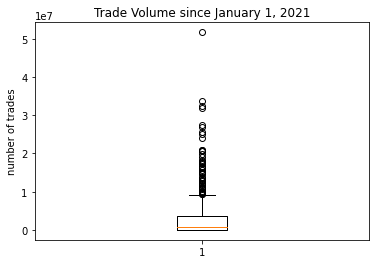

In [7]:
#Make boxplot of trade Volume since 1/1/2021
fig1, ax1 = plt.subplots()
ax1.set_title('Trade Volume since January 1, 2021')
ax1.set_ylabel('number of trades')
ax1.boxplot(volume)
plt.show()

In [8]:
#get daily data set for all time and use this to find out liers for price over time

url_daily = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GME&outputsize=full&apikey={api_key_alpha}"
    
gme_daily = requests.get(url_daily).json()

pprint(gme_daily)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'GME',
               '3. Last Refreshed': '2021-03-22',
               '4. Output Size': 'Full size',
               '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2002-02-13': {'1. open': '19.2500',
                                        '2. high': '20.1200',
                                        '3. low': '19.0500',
                                        '4. close': '20.1000',
                                        '5. volume': '9527000'},
                         '2002-02-14': {'1. open': '20.3500',
                                        '2. high': '20.3900',
                                        '3. low': '19.8500',
                                        '4. close': '20.0000',
                                        '5. volume': '1377700'},
                         '2002-02-15': {'1. open': '20.0500',
             

                                        '3. low': '20.4000',
                                        '4. close': '20.4000',
                                        '5. volume': '146500'},
                         '2002-09-13': {'1. open': '20.2000',
                                        '2. high': '20.2000',
                                        '3. low': '19.6000',
                                        '4. close': '19.6000',
                                        '5. volume': '36000'},
                         '2002-09-16': {'1. open': '19.6100',
                                        '2. high': '20.2400',
                                        '3. low': '19.6000',
                                        '4. close': '20.2100',
                                        '5. volume': '60600'},
                         '2002-09-17': {'1. open': '20.4600',
                                        '2. high': '20.8600',
                                        '3. low': '19.8600',
     

                                        '2. high': '9.4500',
                                        '3. low': '9.0000',
                                        '4. close': '9.0000',
                                        '5. volume': '449600'},
                         '2003-01-28': {'1. open': '9.1000',
                                        '2. high': '9.2500',
                                        '3. low': '8.9000',
                                        '4. close': '8.9900',
                                        '5. volume': '723400'},
                         '2003-01-29': {'1. open': '9.1000',
                                        '2. high': '9.2500',
                                        '3. low': '8.9000',
                                        '4. close': '8.9900',
                                        '5. volume': '445100'},
                         '2003-01-30': {'1. open': '9.1000',
                                        '2. high': '9.1800',
               

                                        '3. low': '13.9500',
                                        '4. close': '14.1200',
                                        '5. volume': '155200'},
                         '2003-07-16': {'1. open': '14.1200',
                                        '2. high': '14.1400',
                                        '3. low': '13.6100',
                                        '4. close': '13.6200',
                                        '5. volume': '209800'},
                         '2003-07-17': {'1. open': '13.2500',
                                        '2. high': '13.5000',
                                        '3. low': '12.9800',
                                        '4. close': '13.5000',
                                        '5. volume': '851200'},
                         '2003-07-18': {'1. open': '13.5000',
                                        '2. high': '13.9200',
                                        '3. low': '13.2900',
   

                                        '3. low': '15.1700',
                                        '4. close': '15.3900',
                                        '5. volume': '261000'},
                         '2003-12-22': {'1. open': '15.2000',
                                        '2. high': '15.3000',
                                        '3. low': '15.0100',
                                        '4. close': '15.0400',
                                        '5. volume': '196100'},
                         '2003-12-23': {'1. open': '15.0900',
                                        '2. high': '15.7300',
                                        '3. low': '15.0900',
                                        '4. close': '15.7300',
                                        '5. volume': '148500'},
                         '2003-12-24': {'1. open': '15.6300',
                                        '2. high': '15.6300',
                                        '3. low': '14.9500',
   

                                        '3. low': '15.0000',
                                        '4. close': '15.1500',
                                        '5. volume': '280400'},
                         '2004-07-15': {'1. open': '15.0800',
                                        '2. high': '15.2400',
                                        '3. low': '15.0300',
                                        '4. close': '15.0900',
                                        '5. volume': '371900'},
                         '2004-07-16': {'1. open': '15.1300',
                                        '2. high': '15.1300',
                                        '3. low': '14.7900',
                                        '4. close': '15.0500',
                                        '5. volume': '244200'},
                         '2004-07-19': {'1. open': '15.0100',
                                        '2. high': '15.1100',
                                        '3. low': '14.7900',
   

                         '2004-11-12': {'1. open': '21.6000',
                                        '2. high': '23.5100',
                                        '3. low': '21.6000',
                                        '4. close': '23.5000',
                                        '5. volume': '2110200'},
                         '2004-11-15': {'1. open': '22.9000',
                                        '2. high': '23.1500',
                                        '3. low': '22.3000',
                                        '4. close': '23.1500',
                                        '5. volume': '2453400'},
                         '2004-11-16': {'1. open': '23.1000',
                                        '2. high': '23.1600',
                                        '3. low': '22.0600',
                                        '4. close': '22.3100',
                                        '5. volume': '1219400'},
                         '2004-11-17': {'1. open': '22.2400',

                                        '4. close': '25.1500',
                                        '5. volume': '509300'},
                         '2005-05-05': {'1. open': '25.2000',
                                        '2. high': '26.2000',
                                        '3. low': '25.1200',
                                        '4. close': '25.8000',
                                        '5. volume': '568100'},
                         '2005-05-06': {'1. open': '25.6500',
                                        '2. high': '26.0300',
                                        '3. low': '25.4600',
                                        '4. close': '25.8300',
                                        '5. volume': '351400'},
                         '2005-05-09': {'1. open': '25.7500',
                                        '2. high': '25.9500',
                                        '3. low': '25.5000',
                                        '4. close': '25.7500',
 

                                        '5. volume': '2681000'},
                         '2005-11-21': {'1. open': '36.8100',
                                        '2. high': '37.8200',
                                        '3. low': '36.0700',
                                        '4. close': '37.8000',
                                        '5. volume': '2436000'},
                         '2005-11-22': {'1. open': '37.8000',
                                        '2. high': '38.1899',
                                        '3. low': '36.0100',
                                        '4. close': '36.5800',
                                        '5. volume': '3487200'},
                         '2005-11-23': {'1. open': '36.6000',
                                        '2. high': '36.8000',
                                        '3. low': '35.4000',
                                        '4. close': '35.4600',
                                        '5. volume': '3272500

                                        '5. volume': '828200'},
                         '2006-05-15': {'1. open': '43.3000',
                                        '2. high': '43.5700',
                                        '3. low': '41.9100',
                                        '4. close': '43.4400',
                                        '5. volume': '1807900'},
                         '2006-05-16': {'1. open': '44.3300',
                                        '2. high': '46.0100',
                                        '3. low': '44.2400',
                                        '4. close': '44.3000',
                                        '5. volume': '1875500'},
                         '2006-05-17': {'1. open': '44.7200',
                                        '2. high': '45.5000',
                                        '3. low': '44.4000',
                                        '4. close': '44.6000',
                                        '5. volume': '1737600'

                                        '5. volume': '1623900'},
                         '2006-09-28': {'1. open': '47.2500',
                                        '2. high': '47.9101',
                                        '3. low': '46.2500',
                                        '4. close': '46.6400',
                                        '5. volume': '2295400'},
                         '2006-09-29': {'1. open': '46.7500',
                                        '2. high': '47.1200',
                                        '3. low': '46.2100',
                                        '4. close': '46.2800',
                                        '5. volume': '749800'},
                         '2006-10-02': {'1. open': '46.7000',
                                        '2. high': '46.7600',
                                        '3. low': '45.7800',
                                        '4. close': '46.1100',
                                        '5. volume': '909700'}

                                        '5. volume': '4876700'},
                         '2007-05-22': {'1. open': '37.3500',
                                        '2. high': '37.7000',
                                        '3. low': '36.2000',
                                        '4. close': '37.6800',
                                        '5. volume': '3317800'},
                         '2007-05-23': {'1. open': '36.8510',
                                        '2. high': '37.3500',
                                        '3. low': '35.6200',
                                        '4. close': '35.8500',
                                        '5. volume': '5560300'},
                         '2007-05-24': {'1. open': '35.8700',
                                        '2. high': '36.2500',
                                        '3. low': '34.7900',
                                        '4. close': '35.2100',
                                        '5. volume': '3187200

                         '2007-10-24': {'1. open': '60.6500',
                                        '2. high': '60.8000',
                                        '3. low': '56.9610',
                                        '4. close': '58.1300',
                                        '5. volume': '1851000'},
                         '2007-10-25': {'1. open': '58.4100',
                                        '2. high': '58.6800',
                                        '3. low': '55.8500',
                                        '4. close': '56.6100',
                                        '5. volume': '2115300'},
                         '2007-10-26': {'1. open': '58.5700',
                                        '2. high': '58.9500',
                                        '3. low': '57.0000',
                                        '4. close': '57.4400',
                                        '5. volume': '3294300'},
                         '2007-10-29': {'1. open': '58.8400',

                                        '3. low': '53.3400',
                                        '4. close': '53.9900',
                                        '5. volume': '3264400'},
                         '2008-05-05': {'1. open': '53.3300',
                                        '2. high': '54.2300',
                                        '3. low': '52.5600',
                                        '4. close': '52.7500',
                                        '5. volume': '2567000'},
                         '2008-05-06': {'1. open': '52.3500',
                                        '2. high': '54.3600',
                                        '3. low': '52.1000',
                                        '4. close': '53.9000',
                                        '5. volume': '2437500'},
                         '2008-05-07': {'1. open': '53.7000',
                                        '2. high': '53.7000',
                                        '3. low': '52.0000',


                                        '3. low': '29.8900',
                                        '4. close': '31.8400',
                                        '5. volume': '3751900'},
                         '2008-10-20': {'1. open': '32.2200',
                                        '2. high': '33.9500',
                                        '3. low': '31.4400',
                                        '4. close': '33.1900',
                                        '5. volume': '2295700'},
                         '2008-10-21': {'1. open': '33.2000',
                                        '2. high': '33.5200',
                                        '3. low': '30.2200',
                                        '4. close': '30.4600',
                                        '5. volume': '2883800'},
                         '2008-10-22': {'1. open': '30.3700',
                                        '2. high': '30.4100',
                                        '3. low': '26.8600',


                                        '3. low': '29.6400',
                                        '4. close': '30.5000',
                                        '5. volume': '3076800'},
                         '2009-04-24': {'1. open': '30.8200',
                                        '2. high': '31.6800',
                                        '3. low': '30.1000',
                                        '4. close': '31.3100',
                                        '5. volume': '2590000'},
                         '2009-04-27': {'1. open': '30.7100',
                                        '2. high': '31.1900',
                                        '3. low': '30.1200',
                                        '4. close': '30.4800',
                                        '5. volume': '2358800'},
                         '2009-04-28': {'1. open': '30.1000',
                                        '2. high': '30.5800',
                                        '3. low': '29.3200',


                                        '3. low': '27.7800',
                                        '4. close': '28.1600',
                                        '5. volume': '2446400'},
                         '2009-10-20': {'1. open': '27.1600',
                                        '2. high': '27.1700',
                                        '3. low': '25.4700',
                                        '4. close': '25.6500',
                                        '5. volume': '12545000'},
                         '2009-10-21': {'1. open': '25.6600',
                                        '2. high': '26.1500',
                                        '3. low': '25.2900',
                                        '4. close': '25.3400',
                                        '5. volume': '7492300'},
                         '2009-10-22': {'1. open': '25.4000',
                                        '2. high': '25.7600',
                                        '3. low': '24.8900',

                                        '2. high': '23.3500',
                                        '3. low': '21.9200',
                                        '4. close': '22.5800',
                                        '5. volume': '7053600'},
                         '2010-05-10': {'1. open': '23.6000',
                                        '2. high': '23.9300',
                                        '3. low': '22.9200',
                                        '4. close': '23.3000',
                                        '5. volume': '4860300'},
                         '2010-05-11': {'1. open': '22.8900',
                                        '2. high': '23.2800',
                                        '3. low': '22.2300',
                                        '4. close': '22.9400',
                                        '5. volume': '6339500'},
                         '2010-05-12': {'1. open': '22.7900',
                                        '2. high': '23.2300',

                         '2010-10-14': {'1. open': '19.2500',
                                        '2. high': '19.4000',
                                        '3. low': '18.6500',
                                        '4. close': '18.8200',
                                        '5. volume': '5743000'},
                         '2010-10-15': {'1. open': '18.8300',
                                        '2. high': '18.9400',
                                        '3. low': '18.2000',
                                        '4. close': '18.3200',
                                        '5. volume': '7647800'},
                         '2010-10-18': {'1. open': '18.4300',
                                        '2. high': '18.6400',
                                        '3. low': '17.9300',
                                        '4. close': '18.2700',
                                        '5. volume': '6254000'},
                         '2010-10-19': {'1. open': '18.0900',

                         '2011-04-06': {'1. open': '23.5800',
                                        '2. high': '24.2200',
                                        '3. low': '23.5500',
                                        '4. close': '23.9000',
                                        '5. volume': '4850000'},
                         '2011-04-07': {'1. open': '23.9400',
                                        '2. high': '24.4100',
                                        '3. low': '23.8800',
                                        '4. close': '24.0300',
                                        '5. volume': '4904300'},
                         '2011-04-08': {'1. open': '24.0200',
                                        '2. high': '24.1800',
                                        '3. low': '23.5400',
                                        '4. close': '23.8100',
                                        '5. volume': '3944400'},
                         '2011-04-11': {'1. open': '23.7400',

                                        '5. volume': '3791300'},
                         '2011-08-11': {'1. open': '20.6400',
                                        '2. high': '21.7400',
                                        '3. low': '20.4700',
                                        '4. close': '21.4400',
                                        '5. volume': '2913800'},
                         '2011-08-12': {'1. open': '21.4800',
                                        '2. high': '21.4800',
                                        '3. low': '20.4700',
                                        '4. close': '20.7200',
                                        '5. volume': '4252900'},
                         '2011-08-15': {'1. open': '20.7800',
                                        '2. high': '21.0300',
                                        '3. low': '20.5500',
                                        '4. close': '20.9500',
                                        '5. volume': '3745300

                                        '2. high': '24.0800',
                                        '3. low': '23.5200',
                                        '4. close': '23.8000',
                                        '5. volume': '3171400'},
                         '2012-03-27': {'1. open': '23.8900',
                                        '2. high': '23.9700',
                                        '3. low': '23.6000',
                                        '4. close': '23.7600',
                                        '5. volume': '2214100'},
                         '2012-03-28': {'1. open': '23.7300',
                                        '2. high': '23.7600',
                                        '3. low': '23.2000',
                                        '4. close': '23.4900',
                                        '5. volume': '3125400'},
                         '2012-03-29': {'1. open': '23.2100',
                                        '2. high': '23.6600',

                                        '4. close': '16.7300',
                                        '5. volume': '1495000'},
                         '2012-08-09': {'1. open': '16.7000',
                                        '2. high': '16.8800',
                                        '3. low': '16.5200',
                                        '4. close': '16.8300',
                                        '5. volume': '1693300'},
                         '2012-08-10': {'1. open': '16.8200',
                                        '2. high': '17.7400',
                                        '3. low': '16.6150',
                                        '4. close': '17.7400',
                                        '5. volume': '4703000'},
                         '2012-08-13': {'1. open': '18.5200',
                                        '2. high': '18.8500',
                                        '3. low': '17.6000',
                                        '4. close': '17.8900'

                                        '2. high': '24.1900',
                                        '3. low': '23.5800',
                                        '4. close': '23.6400',
                                        '5. volume': '2228900'},
                         '2013-01-31': {'1. open': '23.6600',
                                        '2. high': '23.7000',
                                        '3. low': '22.5700',
                                        '4. close': '23.2000',
                                        '5. volume': '5161000'},
                         '2013-02-01': {'1. open': '24.2900',
                                        '2. high': '24.8100',
                                        '3. low': '23.4600',
                                        '4. close': '24.6900',
                                        '5. volume': '4406200'},
                         '2013-02-04': {'1. open': '24.6000',
                                        '2. high': '25.7000',

                                        '5. volume': '1959200'},
                         '2013-07-18': {'1. open': '43.5000',
                                        '2. high': '44.0000',
                                        '3. low': '43.4950',
                                        '4. close': '43.6300',
                                        '5. volume': '938800'},
                         '2013-07-19': {'1. open': '43.8700',
                                        '2. high': '44.4500',
                                        '3. low': '43.3200',
                                        '4. close': '43.4600',
                                        '5. volume': '1675800'},
                         '2013-07-22': {'1. open': '43.5000',
                                        '2. high': '43.8000',
                                        '3. low': '42.9800',
                                        '4. close': '43.0200',
                                        '5. volume': '1088000'

                                        '2. high': '50.5600',
                                        '3. low': '49.0400',
                                        '4. close': '50.5200',
                                        '5. volume': '1844000'},
                         '2013-12-24': {'1. open': '50.3600',
                                        '2. high': '51.2100',
                                        '3. low': '50.3600',
                                        '4. close': '50.9700',
                                        '5. volume': '1150800'},
                         '2013-12-26': {'1. open': '51.0700',
                                        '2. high': '51.5500',
                                        '3. low': '50.1900',
                                        '4. close': '50.3600',
                                        '5. volume': '1518800'},
                         '2013-12-27': {'1. open': '50.3300',
                                        '2. high': '50.6100',

                         '2014-06-10': {'1. open': '36.5400',
                                        '2. high': '37.3700',
                                        '3. low': '36.3100',
                                        '4. close': '37.2900',
                                        '5. volume': '2073300'},
                         '2014-06-11': {'1. open': '37.3400',
                                        '2. high': '39.0700',
                                        '3. low': '37.2900',
                                        '4. close': '37.7400',
                                        '5. volume': '3399200'},
                         '2014-06-12': {'1. open': '37.5500',
                                        '2. high': '37.5950',
                                        '3. low': '36.1800',
                                        '4. close': '36.3000',
                                        '5. volume': '2622400'},
                         '2014-06-13': {'1. open': '36.3300',

                                        '3. low': '31.8100',
                                        '4. close': '31.9200',
                                        '5. volume': '4421366'},
                         '2014-12-17': {'1. open': '32.1100',
                                        '2. high': '32.7300',
                                        '3. low': '31.9000',
                                        '4. close': '32.6900',
                                        '5. volume': '3610636'},
                         '2014-12-18': {'1. open': '33.2500',
                                        '2. high': '33.6500',
                                        '3. low': '32.3950',
                                        '4. close': '33.1000',
                                        '5. volume': '3397117'},
                         '2014-12-19': {'1. open': '33.4700',
                                        '2. high': '34.5000',
                                        '3. low': '32.9300',


                                        '5. volume': '1335237'},
                         '2015-06-15': {'1. open': '42.8700',
                                        '2. high': '43.2700',
                                        '3. low': '42.3200',
                                        '4. close': '42.5200',
                                        '5. volume': '1859235'},
                         '2015-06-16': {'1. open': '42.4200',
                                        '2. high': '42.6500',
                                        '3. low': '41.9700',
                                        '4. close': '42.5100',
                                        '5. volume': '1382972'},
                         '2015-06-17': {'1. open': '42.5200',
                                        '2. high': '43.2285',
                                        '3. low': '42.1800',
                                        '4. close': '43.0300',
                                        '5. volume': '2165589

                                        '2. high': '47.0000',
                                        '3. low': '45.4400',
                                        '4. close': '46.2000',
                                        '5. volume': '2918657'},
                         '2015-08-28': {'1. open': '44.6600',
                                        '2. high': '44.9400',
                                        '3. low': '41.5400',
                                        '4. close': '42.4900',
                                        '5. volume': '8430708'},
                         '2015-08-31': {'1. open': '42.2700',
                                        '2. high': '42.6100',
                                        '3. low': '41.5500',
                                        '4. close': '42.4800',
                                        '5. volume': '2464488'},
                         '2015-09-01': {'1. open': '41.5300',
                                        '2. high': '42.1500',

                                        '4. close': '25.7100',
                                        '5. volume': '1399500'},
                         '2016-01-29': {'1. open': '25.7600',
                                        '2. high': '26.2450',
                                        '3. low': '25.6100',
                                        '4. close': '26.2100',
                                        '5. volume': '2317801'},
                         '2016-02-01': {'1. open': '26.2000',
                                        '2. high': '26.8600',
                                        '3. low': '25.8500',
                                        '4. close': '26.8100',
                                        '5. volume': '2787257'},
                         '2016-02-02': {'1. open': '26.6300',
                                        '2. high': '26.7100',
                                        '3. low': '25.5900',
                                        '4. close': '25.9200'

                                        '5. volume': '3061174'},
                         '2016-06-28': {'1. open': '25.8300',
                                        '2. high': '26.1800',
                                        '3. low': '25.6200',
                                        '4. close': '26.0500',
                                        '5. volume': '2881384'},
                         '2016-06-29': {'1. open': '26.4700',
                                        '2. high': '26.9700',
                                        '3. low': '26.3700',
                                        '4. close': '26.4100',
                                        '5. volume': '2485809'},
                         '2016-06-30': {'1. open': '26.5100',
                                        '2. high': '26.6850',
                                        '3. low': '26.0150',
                                        '4. close': '26.5800',
                                        '5. volume': '1859217

                         '2016-11-23': {'1. open': '24.7300',
                                        '2. high': '26.4100',
                                        '3. low': '24.6400',
                                        '4. close': '26.0600',
                                        '5. volume': '9390261'},
                         '2016-11-25': {'1. open': '26.1400',
                                        '2. high': '26.4850',
                                        '3. low': '25.7800',
                                        '4. close': '25.8200',
                                        '5. volume': '2313321'},
                         '2016-11-28': {'1. open': '26.0000',
                                        '2. high': '26.0000',
                                        '3. low': '24.7550',
                                        '4. close': '25.1500',
                                        '5. volume': '2815671'},
                         '2016-11-29': {'1. open': '24.8500',

                         '2017-05-23': {'1. open': '24.3700',
                                        '2. high': '24.3700',
                                        '3. low': '22.6300',
                                        '4. close': '22.6600',
                                        '5. volume': '5631746'},
                         '2017-05-24': {'1. open': '22.6100',
                                        '2. high': '22.8700',
                                        '3. low': '22.4300',
                                        '4. close': '22.7100',
                                        '5. volume': '2448082'},
                         '2017-05-25': {'1. open': '23.6000',
                                        '2. high': '23.6700',
                                        '3. low': '22.7300',
                                        '4. close': '23.6200',
                                        '5. volume': '7178593'},
                         '2017-05-26': {'1. open': '22.1200',

                         '2017-12-11': {'1. open': '19.2800',
                                        '2. high': '19.3573',
                                        '3. low': '18.6700',
                                        '4. close': '19.0700',
                                        '5. volume': '3652461'},
                         '2017-12-12': {'1. open': '19.1500',
                                        '2. high': '19.2950',
                                        '3. low': '18.9600',
                                        '4. close': '19.1100',
                                        '5. volume': '2532932'},
                         '2017-12-13': {'1. open': '19.1000',
                                        '2. high': '19.1600',
                                        '3. low': '18.6050',
                                        '4. close': '18.6700',
                                        '5. volume': '3077093'},
                         '2017-12-14': {'1. open': '18.7200',

                                        '4. close': '12.7900',
                                        '5. volume': '3839037'},
                         '2018-05-09': {'1. open': '12.8200',
                                        '2. high': '12.9600',
                                        '3. low': '12.6100',
                                        '4. close': '12.9300',
                                        '5. volume': '3752892'},
                         '2018-05-10': {'1. open': '12.9600',
                                        '2. high': '13.2000',
                                        '3. low': '12.8800',
                                        '4. close': '13.0300',
                                        '5. volume': '3118480'},
                         '2018-05-11': {'1. open': '12.6000',
                                        '2. high': '12.8400',
                                        '3. low': '12.4650',
                                        '4. close': '12.7100'

                                        '4. close': '14.9000',
                                        '5. volume': '2044349'},
                         '2018-11-08': {'1. open': '14.9000',
                                        '2. high': '15.0200',
                                        '3. low': '14.7800',
                                        '4. close': '14.8600',
                                        '5. volume': '2139432'},
                         '2018-11-09': {'1. open': '14.7200',
                                        '2. high': '14.8000',
                                        '3. low': '14.3150',
                                        '4. close': '14.6400',
                                        '5. volume': '1671536'},
                         '2018-11-12': {'1. open': '14.6600',
                                        '2. high': '14.7800',
                                        '3. low': '13.8600',
                                        '4. close': '13.8800'

                         '2019-04-16': {'1. open': '9.0000',
                                        '2. high': '9.1500',
                                        '3. low': '8.9473',
                                        '4. close': '9.0800',
                                        '5. volume': '4719989'},
                         '2019-04-17': {'1. open': '9.1100',
                                        '2. high': '9.1200',
                                        '3. low': '8.7500',
                                        '4. close': '8.9400',
                                        '5. volume': '3921094'},
                         '2019-04-18': {'1. open': '8.8600',
                                        '2. high': '9.0275',
                                        '3. low': '8.7400',
                                        '4. close': '8.7700',
                                        '5. volume': '3814181'},
                         '2019-04-22': {'1. open': '8.7500',
            

                                        '4. close': '5.8800',
                                        '5. volume': '3883787'},
                         '2019-10-17': {'1. open': '5.8900',
                                        '2. high': '6.0500',
                                        '3. low': '5.8000',
                                        '4. close': '6.0300',
                                        '5. volume': '3634164'},
                         '2019-10-18': {'1. open': '6.0300',
                                        '2. high': '6.0500',
                                        '3. low': '5.7700',
                                        '4. close': '5.9400',
                                        '5. volume': '3197098'},
                         '2019-10-21': {'1. open': '5.9800',
                                        '2. high': '6.1600',
                                        '3. low': '5.8200',
                                        '4. close': '5.9300',
           

                                        '4. close': '5.0300',
                                        '5. volume': '3348221'},
                         '2020-04-17': {'1. open': '5.2200',
                                        '2. high': '5.2800',
                                        '3. low': '4.4300',
                                        '4. close': '4.8800',
                                        '5. volume': '5623116'},
                         '2020-04-20': {'1. open': '4.8500',
                                        '2. high': '5.9000',
                                        '3. low': '4.7800',
                                        '4. close': '5.6100',
                                        '5. volume': '6084046'},
                         '2020-04-21': {'1. open': '5.2300',
                                        '2. high': '5.3000',
                                        '3. low': '4.7600',
                                        '4. close': '4.7800',
           

                                        '3. low': '9.9300',
                                        '4. close': '10.3500',
                                        '5. volume': '5244339'},
                         '2020-09-30': {'1. open': '10.2500',
                                        '2. high': '10.7597',
                                        '3. low': '10.0600',
                                        '4. close': '10.2000',
                                        '5. volume': '6079033'},
                         '2020-10-01': {'1. open': '10.0900',
                                        '2. high': '10.2500',
                                        '3. low': '9.6900',
                                        '4. close': '9.7700',
                                        '5. volume': '4554055'},
                         '2020-10-02': {'1. open': '9.3800',
                                        '2. high': '9.7800',
                                        '3. low': '9.3000',
      

In [9]:
daily_df = pd.DataFrame(gme_daily['Time Series (Daily)']).T
daily_df = daily_df.rename(columns={'1. open': 'Opening Price Daily',
                                '2. high': 'Highest Price Daily',
                                '3. low': 'Lowest Price Daily',
                                '4. close': 'Closing Price Daily',
                                '5. volume': 'Trade Volume Daily'})
daily_df

,Opening Price Daily,Highest Price Daily,Lowest Price Daily,Closing Price Daily,Trade Volume Daily
2021-03-22,205.2600,210.3562,186.1952,194.4900,9600874
2021-03-19,195.7300,227.0000,182.6600,200.2700,24677297
2021-03-18,214.0000,218.8800,195.6500,201.7500,11799914
2021-03-17,217.8400,231.4700,204.0000,209.8100,16481589
2021-03-16,203.1600,220.7000,172.3500,208.1700,35422867
...,...,...,...,...,...
2002-02-20,19.7500,19.7500,19.0500,19.7500,861600
2002-02-19,19.8000,19.8000,18.7500,19.1000,926300
2002-02-15,20.0500,20.0500,19.7000,19.9000,1048700
2002-02-14,20.3500,20.3900,19.8500,20.0000,1377700


In [10]:
#We will be analyzing highest price and volume
#Create Lists:
opening_daily = daily_df['Opening Price Daily'].astype(float)
closing_daily = daily_df['Closing Price Daily'].astype(float)
low_daily = daily_df['Lowest Price Daily'].astype(float)
high_daily = daily_df['Highest Price Daily'].astype(float)
volume_daily = daily_df['Trade Volume Daily'].astype(float)

#Find QUartiles:
#Find quartiles of Highest Price
quartiles = high_daily.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
price_lower_bound = lowerq - (1.5*iqr)
price_upper_bound = upperq + (1.5*iqr)
print("Highest Price Quartiles:")
print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The median: {quartiles[0.5]} ")
print(f"Values below {round(price_lower_bound, 6)} could be outliers.")
print(f"Values above {round(price_upper_bound, 6)} could be outliers.")  
print("-----------------------------------------")

#Find quartiles of Volume
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
volume_lower_bound = lowerq - (1.5*iqr)
volume_upper_bound = upperq + (1.5*iqr)
print("Trade Volume Quartiles:")
print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The median: {quartiles[0.5]} ")
print(f"Values below {round(volume_lower_bound, 6)} could be outliers.")
print(f"Values above {round(volume_upper_bound, 6)} could be outliers.") 

Highest Price Quartiles:
The lower quartile: 18.12
The upper quartile: 37.89
The interquartile range: 19.77
The median: 23.97 
Values below -11.535 could be outliers.
Values above 67.545 could be outliers.
-----------------------------------------
Trade Volume Quartiles:
The lower quartile: 89344.25
The upper quartile: 3744178.75
The interquartile range: 3654834.5
The median: 844460.0 
Values below -5392907.5 could be outliers.
Values above 9226430.5 could be outliers.


In [11]:
# Since it is not possible for a stock price to go below $0
# or for Volume to be below zero, we only need to look at the upperbound
price_outliers = []
#Create Dataframe of Outliers for highest price
#for price in high:
   # if price > price_upper_bound:
       #print(f"Price Outliner:          {price}  "on " )         

In [12]:
# Since it is not possible for a stock price to go below $0
# or for Volume to be below zero, we only need to look at the upperbound
price_outliers = []
#Create Dataframe of Outliers for highest price
for price in high:
    if price > price_upper_bound:
        price_outliers.append(daily_df['Highest Price Daily'])
        
        
        
        
        
        #price_outliers.append(GME_df_hourly['Highest Price']['Volume'])          

In [13]:
outliers_df = pd.DataFrame(price_outliers).T
#len(outliers_df)


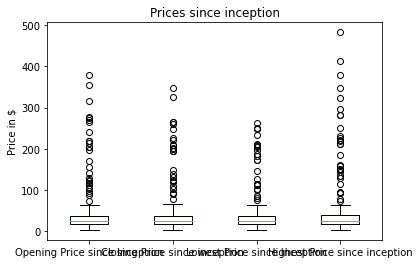

In [14]:
#Make boxplot of prices since inception
fig1, ax1 = plt.subplots()
plot_GME = [opening_daily,closing_daily,low_daily,high_daily]
price_labels = ["Opening Price since Inception", "Closing Price since inception","Lowest Price since Inception","Highest Price since inception"]
ax1.set_title('Prices since inception')
ax1.set_ylabel('Price in $')
ax1.boxplot(plot_GME,labels=price_labels)

plt.show()

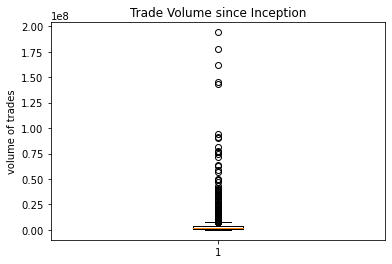

In [15]:
#Make boxplot of trade Volume since Inception
fig1, ax1 = plt.subplots()
ax1.set_title('Trade Volume since Inception')
ax1.set_ylabel('number of trades')
ax1.set_ylabel('volume of trades')
ax1.boxplot(volume_daily)
plt.show()

In [16]:
#get daily data set AMC
url_amc = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMC&outputsize=full&apikey={api_key_alpha}"
amc_daily = requests.get(url_amc).json()
pprint(amc_daily)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'AMC',
               '3. Last Refreshed': '2021-03-22',
               '4. Output Size': 'Full size',
               '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2013-12-18': {'1. open': '19.1800',
                                        '2. high': '19.7900',
                                        '3. low': '18.9000',
                                        '4. close': '18.9000',
                                        '5. volume': '5457200'},
                         '2013-12-19': {'1. open': '18.9000',
                                        '2. high': '19.4900',
                                        '3. low': '18.8100',
                                        '4. close': '19.4900',
                                        '5. volume': '1605400'},
                         '2013-12-20': {'1. open': '19.6500',
             

                                        '5. volume': '569200'},
                         '2014-03-20': {'1. open': '23.4700',
                                        '2. high': '23.6500',
                                        '3. low': '22.9800',
                                        '4. close': '23.5100',
                                        '5. volume': '429200'},
                         '2014-03-21': {'1. open': '23.2800',
                                        '2. high': '23.6900',
                                        '3. low': '22.8200',
                                        '4. close': '23.0600',
                                        '5. volume': '1645900'},
                         '2014-03-24': {'1. open': '23.0000',
                                        '2. high': '23.2300',
                                        '3. low': '22.3000',
                                        '4. close': '23.1800',
                                        '5. volume': '385500'},

                                        '5. volume': '83200'},
                         '2014-08-14': {'1. open': '23.1700',
                                        '2. high': '23.1700',
                                        '3. low': '22.6800',
                                        '4. close': '22.7400',
                                        '5. volume': '89000'},
                         '2014-08-15': {'1. open': '22.9500',
                                        '2. high': '23.2400',
                                        '3. low': '22.3800',
                                        '4. close': '23.1000',
                                        '5. volume': '118800'},
                         '2014-08-18': {'1. open': '23.3000',
                                        '2. high': '23.7300',
                                        '3. low': '23.1800',
                                        '4. close': '23.4300',
                                        '5. volume': '143900'},
  

                                        '3. low': '26.0300',
                                        '4. close': '26.3400',
                                        '5. volume': '237876'},
                         '2014-12-30': {'1. open': '26.3100',
                                        '2. high': '26.7200',
                                        '3. low': '26.0800',
                                        '4. close': '26.1000',
                                        '5. volume': '229254'},
                         '2014-12-31': {'1. open': '26.2000',
                                        '2. high': '26.3750',
                                        '3. low': '26.1401',
                                        '4. close': '26.1800',
                                        '5. volume': '380761'},
                         '2015-01-02': {'1. open': '26.2600',
                                        '2. high': '26.3000',
                                        '3. low': '24.9300',
   

                         '2015-06-23': {'1. open': '30.5500',
                                        '2. high': '30.5500',
                                        '3. low': '30.1900',
                                        '4. close': '30.4200',
                                        '5. volume': '157727'},
                         '2015-06-24': {'1. open': '30.3600',
                                        '2. high': '30.4800',
                                        '3. low': '29.8200',
                                        '4. close': '30.1300',
                                        '5. volume': '120839'},
                         '2015-06-25': {'1. open': '30.1600',
                                        '2. high': '30.3300',
                                        '3. low': '29.5600',
                                        '4. close': '30.2800',
                                        '5. volume': '189995'},
                         '2015-06-26': {'1. open': '30.3700',
  

                                        '5. volume': '228149'},
                         '2015-12-28': {'1. open': '23.0000',
                                        '2. high': '23.2600',
                                        '3. low': '22.7600',
                                        '4. close': '23.0300',
                                        '5. volume': '420786'},
                         '2015-12-29': {'1. open': '23.1800',
                                        '2. high': '23.5500',
                                        '3. low': '22.9800',
                                        '4. close': '23.4400',
                                        '5. volume': '290079'},
                         '2015-12-30': {'1. open': '23.3800',
                                        '2. high': '23.8700',
                                        '3. low': '23.3200',
                                        '4. close': '23.6600',
                                        '5. volume': '247200'},


                                        '5. volume': '196820'},
                         '2016-07-01': {'1. open': '27.6800',
                                        '2. high': '28.2600',
                                        '3. low': '27.3500',
                                        '4. close': '28.1900',
                                        '5. volume': '212053'},
                         '2016-07-05': {'1. open': '28.0000',
                                        '2. high': '28.0000',
                                        '3. low': '27.1000',
                                        '4. close': '27.4100',
                                        '5. volume': '108090'},
                         '2016-07-06': {'1. open': '27.1400',
                                        '2. high': '27.4300',
                                        '3. low': '26.9700',
                                        '4. close': '27.1100',
                                        '5. volume': '74978'},
 

                                        '3. low': '34.3500',
                                        '4. close': '35.5000',
                                        '5. volume': '411070'},
                         '2016-11-18': {'1. open': '35.2000',
                                        '2. high': '35.3000',
                                        '3. low': '34.7500',
                                        '4. close': '35.0500',
                                        '5. volume': '278089'},
                         '2016-11-21': {'1. open': '35.2000',
                                        '2. high': '35.3500',
                                        '3. low': '34.5500',
                                        '4. close': '34.7500',
                                        '5. volume': '315913'},
                         '2016-11-22': {'1. open': '35.0000',
                                        '2. high': '35.0500',
                                        '3. low': '34.6500',
   

                                        '2. high': '30.6500',
                                        '3. low': '29.9500',
                                        '4. close': '30.4000',
                                        '5. volume': '1909098'},
                         '2017-03-14': {'1. open': '30.3500',
                                        '2. high': '30.8250',
                                        '3. low': '30.2500',
                                        '4. close': '30.5500',
                                        '5. volume': '1575714'},
                         '2017-03-15': {'1. open': '30.0000',
                                        '2. high': '30.3750',
                                        '3. low': '29.5493',
                                        '4. close': '30.1000',
                                        '5. volume': '1187678'},
                         '2017-03-16': {'1. open': '30.1000',
                                        '2. high': '30.4000',

                                        '5. volume': '2550634'},
                         '2017-08-17': {'1. open': '13.3000',
                                        '2. high': '13.9000',
                                        '3. low': '13.1500',
                                        '4. close': '13.1500',
                                        '5. volume': '3267364'},
                         '2017-08-18': {'1. open': '13.1000',
                                        '2. high': '13.2000',
                                        '3. low': '12.0500',
                                        '4. close': '13.0000',
                                        '5. volume': '7116852'},
                         '2017-08-21': {'1. open': '13.0000',
                                        '2. high': '13.1500',
                                        '3. low': '12.4250',
                                        '4. close': '13.0500',
                                        '5. volume': '3921100

                                        '2. high': '14.1500',
                                        '3. low': '13.7500',
                                        '4. close': '14.1000',
                                        '5. volume': '2147593'},
                         '2018-01-12': {'1. open': '14.1500',
                                        '2. high': '14.7000',
                                        '3. low': '13.9500',
                                        '4. close': '14.4500',
                                        '5. volume': '4656847'},
                         '2018-01-16': {'1. open': '14.5000',
                                        '2. high': '14.6000',
                                        '3. low': '13.6050',
                                        '4. close': '13.6500',
                                        '5. volume': '2243870'},
                         '2018-01-17': {'1. open': '13.7000',
                                        '2. high': '13.9500',

                                        '2. high': '16.2000',
                                        '3. low': '15.8000',
                                        '4. close': '15.9000',
                                        '5. volume': '999043'},
                         '2018-07-02': {'1. open': '15.8500',
                                        '2. high': '15.9000',
                                        '3. low': '15.5500',
                                        '4. close': '15.7500',
                                        '5. volume': '1158814'},
                         '2018-07-03': {'1. open': '15.9500',
                                        '2. high': '15.9500',
                                        '3. low': '15.5750',
                                        '4. close': '15.8500',
                                        '5. volume': '729271'},
                         '2018-07-05': {'1. open': '16.0000',
                                        '2. high': '16.8500',
 

                                        '2. high': '15.2300',
                                        '3. low': '14.4900',
                                        '4. close': '15.1200',
                                        '5. volume': '2025431'},
                         '2018-12-12': {'1. open': '15.2600',
                                        '2. high': '15.4400',
                                        '3. low': '15.0500',
                                        '4. close': '15.2700',
                                        '5. volume': '1807885'},
                         '2018-12-13': {'1. open': '15.3300',
                                        '2. high': '15.4000',
                                        '3. low': '14.6100',
                                        '4. close': '14.8600',
                                        '5. volume': '1086654'},
                         '2018-12-14': {'1. open': '14.7100',
                                        '2. high': '14.9800',

                                        '2. high': '12.5200',
                                        '3. low': '12.0100',
                                        '4. close': '12.0600',
                                        '5. volume': '1886607'},
                         '2019-05-30': {'1. open': '12.0600',
                                        '2. high': '12.3900',
                                        '3. low': '11.9100',
                                        '4. close': '12.0100',
                                        '5. volume': '1622199'},
                         '2019-05-31': {'1. open': '11.8800',
                                        '2. high': '12.1400',
                                        '3. low': '11.7100',
                                        '4. close': '11.9800',
                                        '5. volume': '1439589'},
                         '2019-06-03': {'1. open': '11.9400',
                                        '2. high': '12.0300',

                                        '2. high': '8.7100',
                                        '3. low': '8.2200',
                                        '4. close': '8.6700',
                                        '5. volume': '4168226'},
                         '2019-12-03': {'1. open': '8.5700',
                                        '2. high': '8.5827',
                                        '3. low': '8.2100',
                                        '4. close': '8.2700',
                                        '5. volume': '3674322'},
                         '2019-12-04': {'1. open': '8.3000',
                                        '2. high': '8.3200',
                                        '3. low': '7.8800',
                                        '4. close': '7.9300',
                                        '5. volume': '4293479'},
                         '2019-12-05': {'1. open': '7.9500',
                                        '2. high': '8.0200',
            

                                        '3. low': '4.9100',
                                        '4. close': '5.1200',
                                        '5. volume': '19603772'},
                         '2020-05-13': {'1. open': '5.0200',
                                        '2. high': '5.0300',
                                        '3. low': '4.5100',
                                        '4. close': '4.6000',
                                        '5. volume': '10414413'},
                         '2020-05-14': {'1. open': '4.2500',
                                        '2. high': '4.6500',
                                        '3. low': '4.0800',
                                        '4. close': '4.5500',
                                        '5. volume': '5912068'},
                         '2020-05-15': {'1. open': '4.4700',
                                        '2. high': '4.6200',
                                        '3. low': '4.4400',
           

                         '2020-12-11': {'1. open': '4.0400',
                                        '2. high': '4.2500',
                                        '3. low': '3.8700',
                                        '4. close': '3.9200',
                                        '5. volume': '22310377'},
                         '2020-12-14': {'1. open': '4.0100',
                                        '2. high': '4.0100',
                                        '3. low': '3.0000',
                                        '4. close': '3.1900',
                                        '5. volume': '67158976'},
                         '2020-12-15': {'1. open': '3.2400',
                                        '2. high': '3.2400',
                                        '3. low': '2.7600',
                                        '4. close': '2.8600',
                                        '5. volume': '54432125'},
                         '2020-12-16': {'1. open': '2.8700',
         

In [17]:
AMC_df = pd.DataFrame(amc_daily['Time Series (Daily)']).T
AMC_df = AMC_df.rename(columns={'1. open': 'Opening Price Daily for AMC',
                                '2. high': 'Highest Price Daily for AMC',
                                '3. low': 'Lowest Price Daily for AMC',
                                '4. close': 'Closing Price Daily for AMC',
                                '5. volume': 'Trade Volume Daily for AMC'})
AMC_df

,Opening Price Daily for AMC,Highest Price Daily for AMC,Lowest Price Daily for AMC,Closing Price Daily for AMC,Trade Volume Daily for AMC
2021-03-22,13.1500,13.1900,11.7600,12.4900,87693847
2021-03-19,14.1400,14.1800,13.2800,13.9300,153205985
2021-03-18,14.3400,14.5400,13.5700,14.0000,122212275
2021-03-17,13.2400,13.6600,13.0000,13.5600,78053640
2021-03-16,13.6200,13.6200,12.3400,13.0200,125967622
...,...,...,...,...,...
2013-12-24,19.7400,19.8200,19.5000,19.5300,213700
2013-12-23,19.7900,19.9900,19.5000,19.7400,698100
2013-12-20,19.6500,19.7700,19.4000,19.6800,737100
2013-12-19,18.9000,19.4900,18.8100,19.4900,1605400


In [18]:
#Create Lists:
opening_amc = AMC_df['Opening Price Daily for AMC'].astype(float)
closing_amc = AMC_df['Closing Price Daily for AMC'].astype(float)
low_amc = AMC_df['Lowest Price Daily for AMC'].astype(float)
high_amc = AMC_df['Closing Price Daily for AMC'].astype(float)
volume_amc = AMC_df['Trade Volume Daily for AMC'].astype(float)

In [41]:
#get daily data set AMC
url_bby = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BBY&outputsize=full&apikey={api_key_alpha}"
bby_daily = requests.get(url_bby).json()
#pprint(bby_daily)

In [43]:
bby_df = pd.DataFrame(bby_daily['Time Series (Daily)']).T
bby_df = bby_df.rename(columns={'1. open': 'Opening Price Daily for Best Buy',
                                '2. high': 'Highest Price Daily for Best Buy',
                                '3. low': 'Lowest Price Daily for Best Buy',
                                '4. close': 'Closing Price Daily for Best Buy',
                                '5. volume': 'Trade Volume Daily for Best Buy'})
#bby_df

In [21]:
#Create Lists:
opening_bby = bby_df['Opening Price Daily for Best Buy'].astype(float)
closing_bby = bby_df['Closing Price Daily for Best Buy'].astype(float)
low_bby = bby_df['Lowest Price Daily for Best Buy'].astype(float)
high_bby = bby_df['Closing Price Daily for Best Buy'].astype(float)
volume_bby = bby_df['Trade Volume Daily for Best Buy'].astype(float)

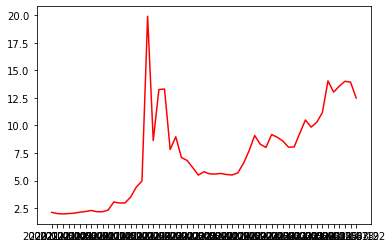

In [52]:
# get AMC 2021 
amc_21_flip = AMC_df[:55]
amc_21 = amc_21_flip.iloc[::-1]
date_amc = amc_21.index
date_amc
high_amc = amc_21['Closing Price Daily for AMC'].astype(float)
amc_plot, = plt.plot(date_amc, high_amc,color="red", label="AMC")
#plt.xticks([])
#plt.xlabel("January-March 2021")
#plt.show

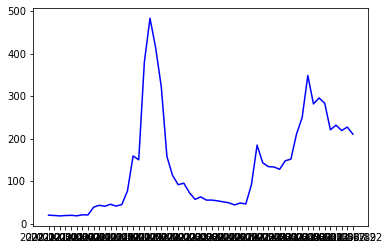

In [51]:
# get GME 2021 
gme_21_flip = daily_df[:55]
gme_21 = gme_21_flip.iloc[::-1]
date_gme = gme_21.index
high_gme = gme_21['Highest Price Daily'].astype(float)
gme_plot, = plt.plot(date_gme, high_gme,color="blue",label="GameStop")
#plt.xticks([])
#plt.xlabel("January-March 2021")
#plt.show

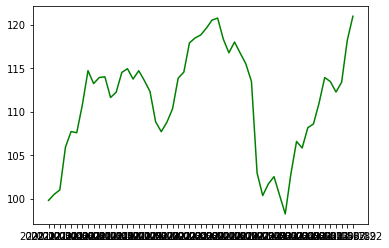

In [50]:
# get GME 2021 
bby_21_flip = bby_df[:55]
bby_21 = bby_21_flip.iloc[::-1]
date_bby = bby_21.index
high_bby = bby_21['Closing Price Daily for Best Buy'].astype(float)
bby_plot, = plt.plot(date_bby, high_bby,color="green", label="Best Buy")
#plt.xticks([])
#plt.xlabel("January-March 2021")
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

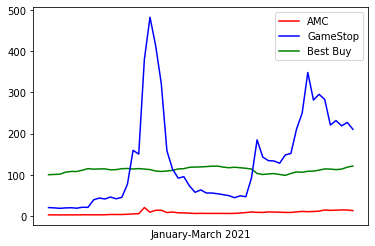

In [53]:
# Create a legend for our chart
bby_plot, = plt.plot(date_bby, high_bby,color="green", label="Best Buy")
gme_plot, = plt.plot(date_gme, high_gme,color="blue",label="GameStop")
amc_plot, = plt.plot(date_amc, high_amc,color="red", label="AMC")

plt.legend(handles=[amc_plot, gme_plot, bby_plot])
plt.xticks([])
plt.xlabel("January-March 2021")
#plt.set_ylim([0,2200])
plt.show